 # Lab | Customer Analysis Round 2

In [324]:
import numpy as np

In [325]:
import pandas as pd

In [326]:
import time
from datetime import date

In [327]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [328]:
%matplotlib inline

In [329]:
#import the model

from sklearn import linear_model

#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score 

In [330]:
marketing = pd.read_csv('marketing_customer_analysis.csv') 
marketing.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [331]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [332]:
# Removing the column index0 and column index 11
marketing = marketing.drop(['Unnamed: 0','Location Code'],axis = 1)

In [333]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10910 non-null  object 
 1   State                          10279 non-null  object 
 2   Customer Lifetime Value        10910 non-null  float64
 3   Response                       10279 non-null  object 
 4   Coverage                       10910 non-null  object 
 5   Education                      10910 non-null  object 
 6   Effective To Date              10910 non-null  object 
 7   EmploymentStatus               10910 non-null  object 
 8   Gender                         10910 non-null  object 
 9   Income                         10910 non-null  int64  
 10  Marital Status                 10910 non-null  object 
 11  Monthly Premium Auto           10910 non-null  int64  
 12  Months Since Last Claim        10277 non-null 

 # Dealing with the data

 ## Show the dataframe shape

In [334]:
marketing.shape

(10910, 24)

In [335]:
marketing.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

 ## Standardize header name

In [336]:
#lower name o the columns and replace spaces with '_'
marketing.columns = [column.lower().replace(' ','_') for column in marketing.columns]

In [337]:
marketing.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

 ## Find Numerical

In [338]:
#storing the numeric data in a new variable 
nume = marketing._get_numeric_data().columns
nume

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

 ## Find Categorical

In [339]:
# To know the categorical columns i just substracted the main data columns with the new numerical list
list(set(marketing)-set(nume))

['marital_status',
 'policy_type',
 'renew_offer_type',
 'education',
 'response',
 'vehicle_type',
 'employmentstatus',
 'state',
 'customer',
 'sales_channel',
 'policy',
 'coverage',
 'vehicle_size',
 'effective_to_date',
 'gender',
 'vehicle_class']

 ## Find and deal with NaN

In [340]:
 ## To check if any is there
marketing.isnull().values.any()

True

In [341]:
# The percentage of NaN values in each column
nulls_df = pd.DataFrame(round(marketing.isna().sum()/len(marketing),4)*100)
nulls_df = nulls_df.rename(columns={'index':'header',0:'percentagenulls'})

In [342]:
nulls_df

,percentagenulls
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00
income,0.00


In [343]:
# The column vehicle type has more than 50% of NaN values, so i drop the complete column
# I am not sure if its ok...Question for next review :)
marketing = marketing.drop(['vehicle_type'],axis=1)

In [344]:
marketing.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [345]:
# drop all the rows which has NaN
df = pd.DataFrame(marketing)
marketing = df.dropna()
marketing.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize


In [346]:
marketing.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

 ## Datetime Format

In [347]:
marketing.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [348]:
pd.to_datetime(marketing['effective_to_date'], errors='raise')

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
6       2011-02-14
           ...    
10903   2011-01-07
10904   2011-02-24
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [349]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   

In [350]:
#new column created and named as Month
pd.DatetimeIndex(marketing['effective_to_date']).month

Int64Index([2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
            ...
            1, 2, 2, 1, 1, 1, 2, 1, 2, 2],
           dtype='int64', name='effective_to_date', length=9134)

In [351]:
marketing.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize


## Filtering the data

In [352]:
 # Filtering data to show only the first quater
#marketing[marketing['effective_to_date'].dt.quarter == 1]

In [353]:
#first_q_data = marketing[marketing['effective_to_date'].dt.quarter == 1]

In [354]:
#first_q_data['Month'].value_counts()

 # Lab | Customer Analysis Round 3

In [355]:
marketing.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [356]:
marketing_num = marketing._get_numeric_data()

In [357]:
marketing_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107


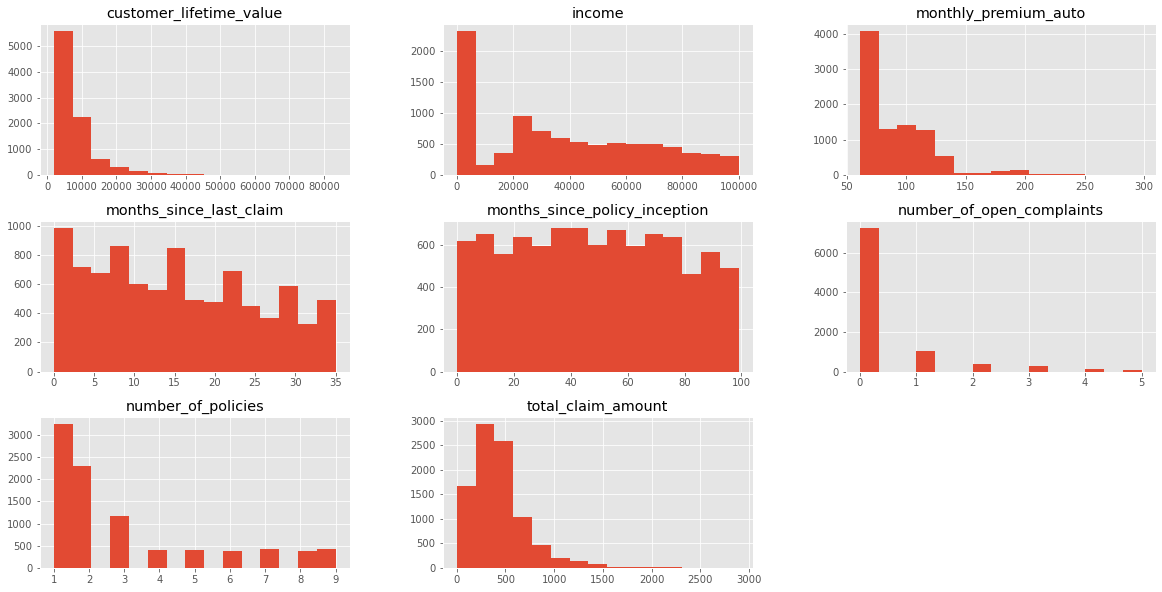

In [358]:
#all histograms
marketing_num.hist(bins=15,figsize=(20,10),layout=(3,3));

 # Lab | Cutomer Analysis Round 4

 ## Check the datatypes of the columns

In [359]:
marketing.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

 ## Get the numeric and categorical dataframe

In [360]:
# got numeric data using the function np.number
numerical = marketing.select_dtypes(include=np.number)
numerical.head(20)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107
7,4956.247235,87197,63,35.0,45,0.0,3,247.402353
8,5989.773931,66839,154,33.0,24,0.0,1,739.200000
9,17114.328150,70961,85,19.0,8,0.0,2,408.000000
10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
12,19955.257130,69096,99,24.0,32,0.0,2,64.669515


In [361]:
categorical = marketing.select_dtypes(include=object)
categorical.head(3)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize


 ## Check thenormality of the numeric variables visually

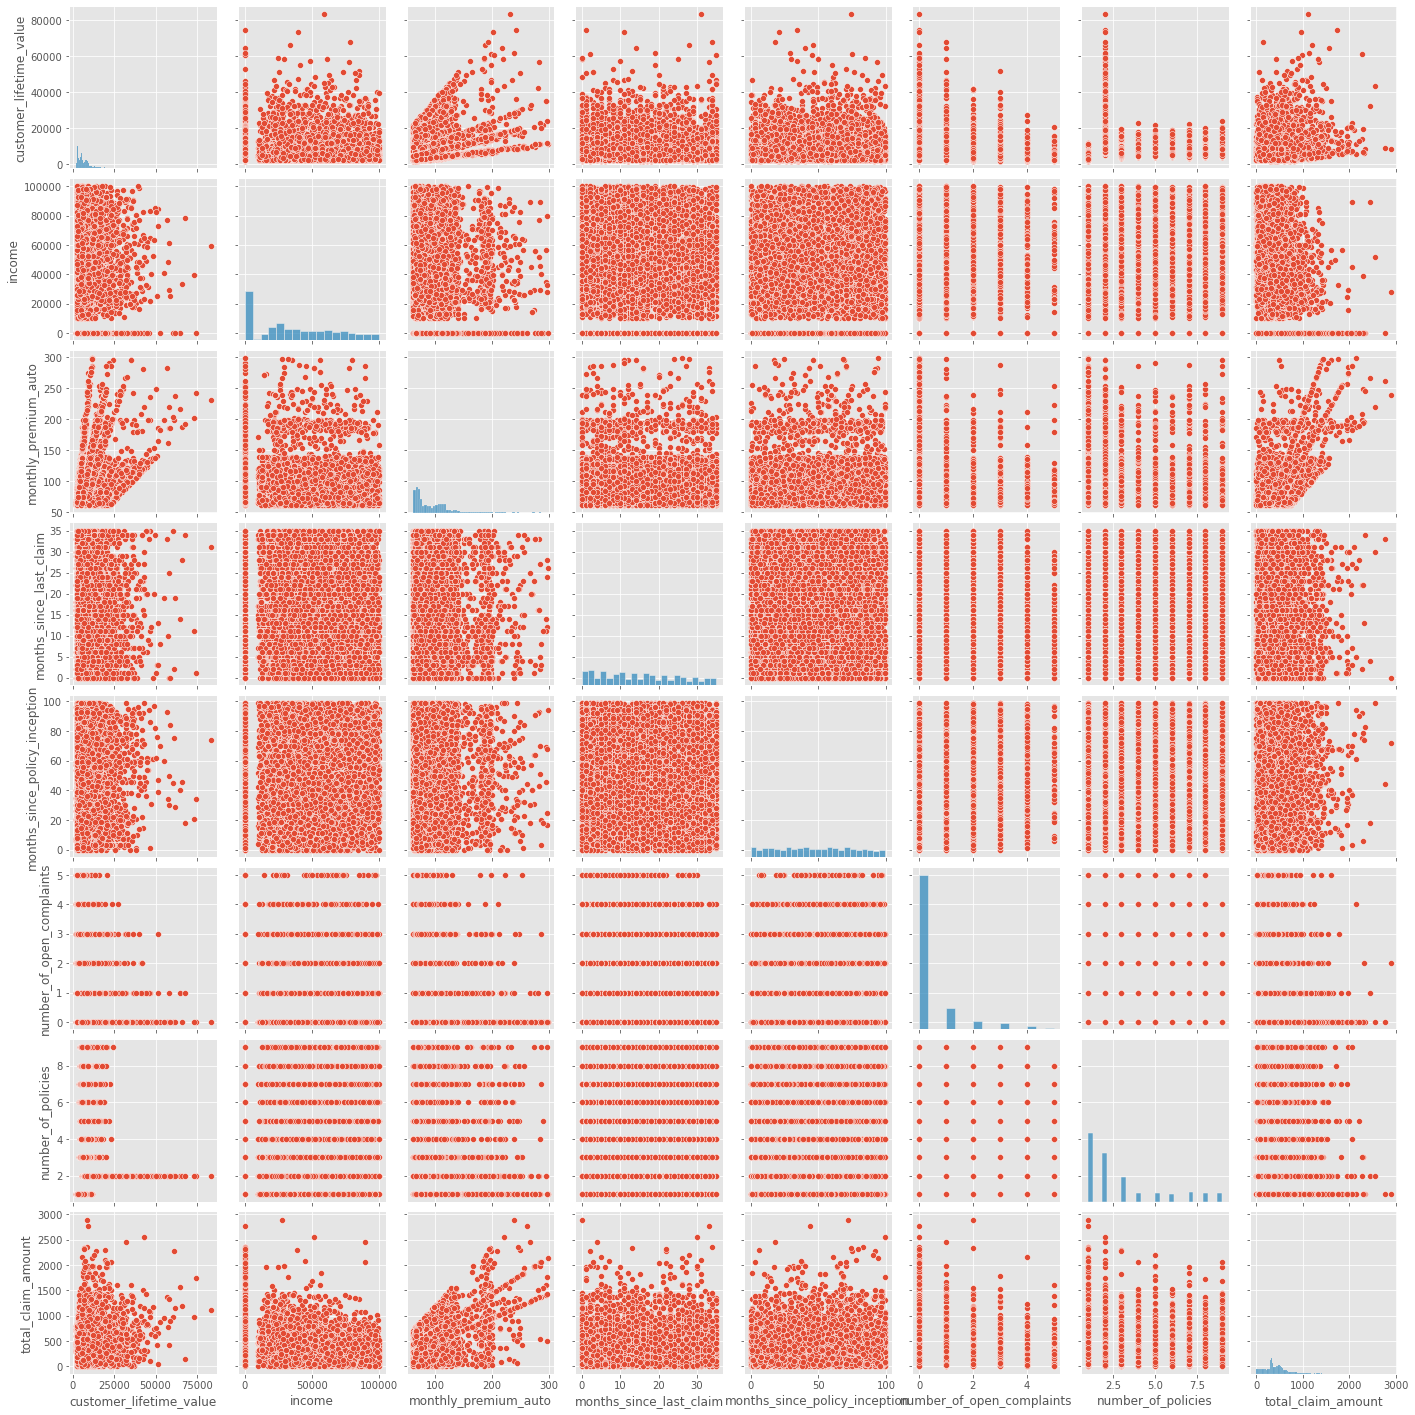

In [362]:
#Construct distribution plots for the numerical variables
sns.pairplot(numerical)

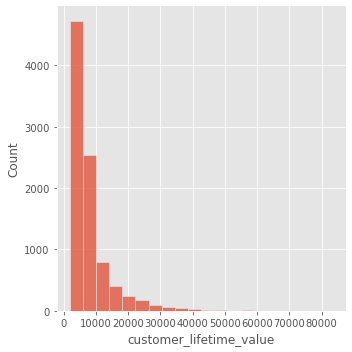

In [363]:
sns.displot(marketing['customer_lifetime_value'],bins  = 20)

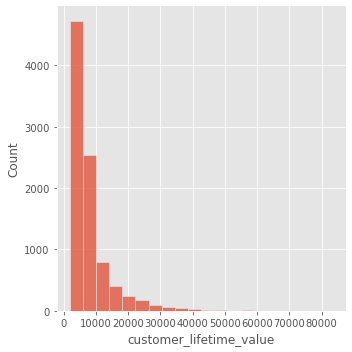

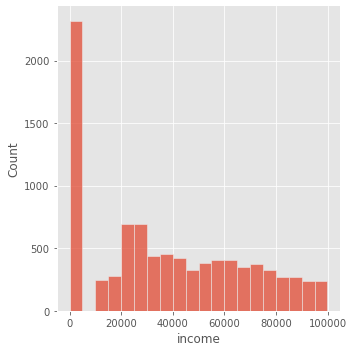

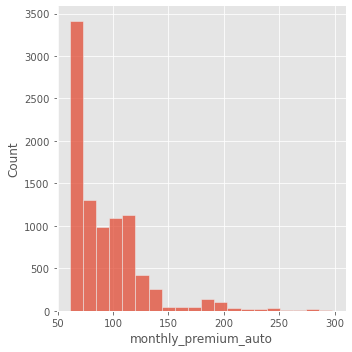

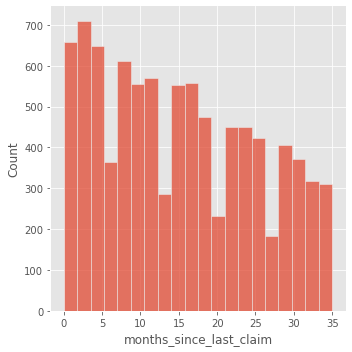

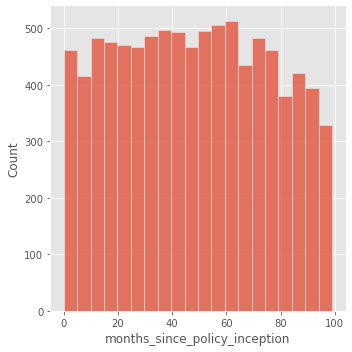

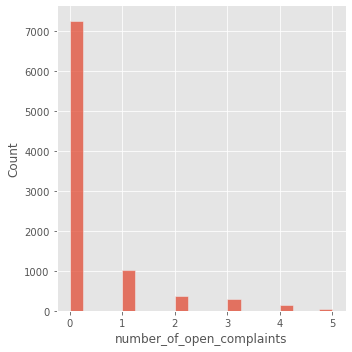

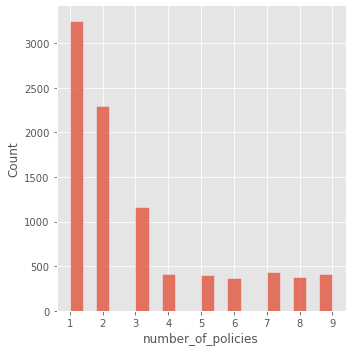

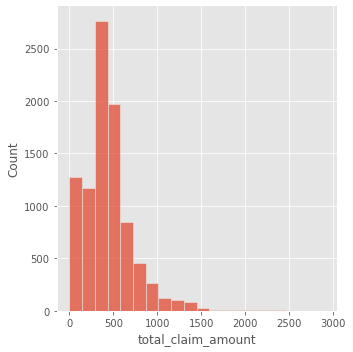

In [364]:
#Histogram for all the numerical columns
for col in numerical.columns:
    sns.displot(numerical[col],bins =20)
    plt.show()

In [365]:
 ## Check for multicolinearity
correlations = numerical.corr()
print(correlations)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                

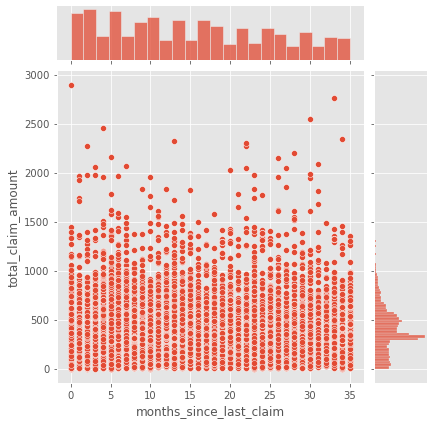

In [366]:
#Distributions for different numerical variables
sns.jointplot(x=numerical['months_since_last_claim'],y=numerical['total_claim_amount'])

In [367]:
# in the following, we want to create a heatmap, in which we plot a ll correlation coefficients
#coefficients between pairwise
#permutations of the numerical columns(correlation all columns with each other)

<AxesSubplot:>

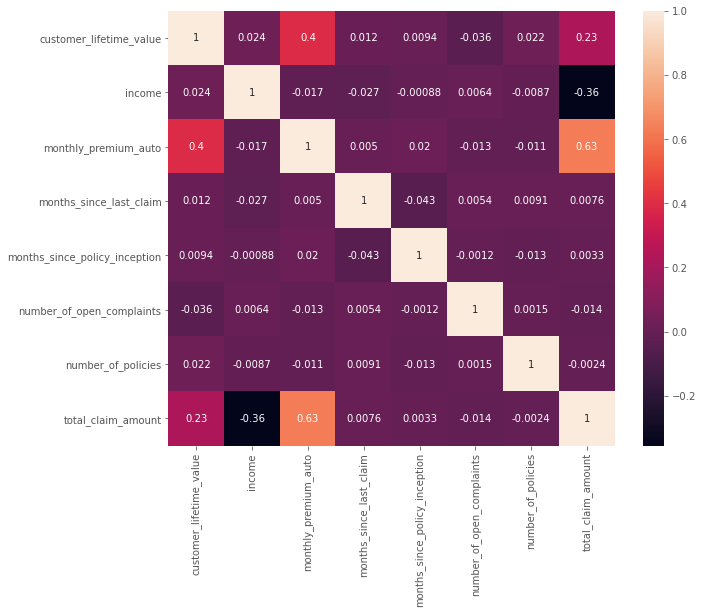

In [368]:
# heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(numerical.corr(),annot=True,ax = ax)

 ##### What is calculated here? 
 df.corr() calculates (per default at least) the Pearson's correlation coefficient, pairwise between all columns of the dataframe df you run the function on. To have an overview of the degree of correlation between the columns is important when we later want to use some of them to build a model (for example with linear regression) to predict another (here maybe customer_lifetime_value). More of that in the upcoming lessons.

Back to the plot: We're only interested in the one direction correlation (column A with B), because the other direction (column B with A) yields the same value. So we only want to show the area below the main diagonal. To do that, we can define a mask of True/False values and pass that to the sns.heatmap(), telling the heatmap, which fields to "deactivate"

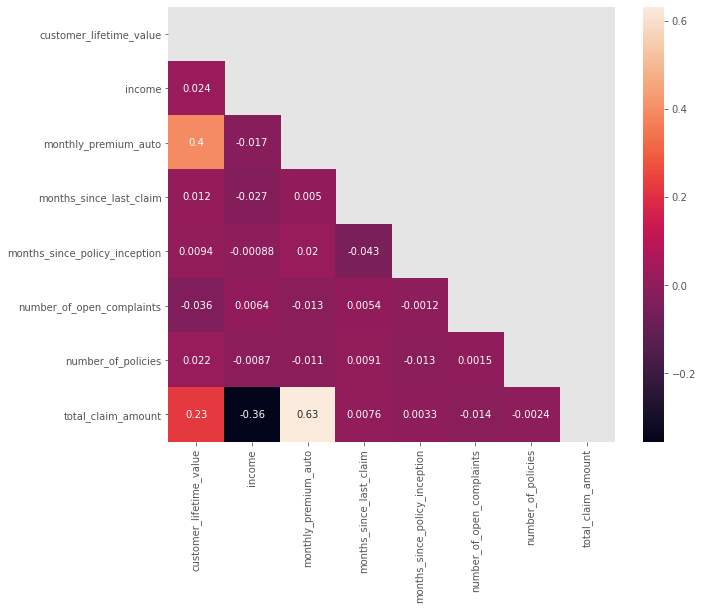

In [369]:
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True

# now we'll do the same heatmap plot again
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numerical.corr(),
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,
            ax=ax,
                )
plt.show()

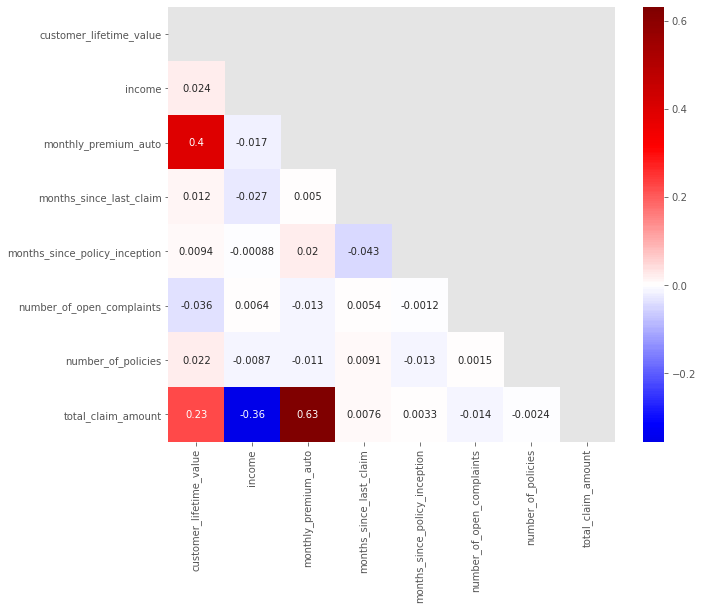

In [370]:
# let's pick seismic!
# and set the colormap so that r = 0.0 corresponds to ideal white

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numerical.corr(),  # the data for the heatmap
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,  # show the actual values of correlation
            cmap='seismic',  # provide the 'seismic' colormap
            center=0,  # specify the value at which to center the colormap
           )
plt.show()

 ##### 
 we see a relatively high correlation between monthly_premium_auto and customer_lifetime_value, of 0.4, as well as between total_claim_amount and monthly_premium_auto of 0.63.
So, what next?. Assume that we're employed by that insurance company and want to predict the Customer Lifetime value of a new customer based on customer data of customers that are already in our databas. So if in a next step (data modeling) customer_lifetime_value is the so called ("dependent") "target variable" that we want to predict in a linear regression model, and we find that the independent variables total_claim_amount and monthly_premium_auto are relatively high correlated, we might consider to drop one of the later before modeling , since they explain each other really well and one of them doesn't add much predictive power to our model. Even worse: They negatively influence the predictive power of each other with respect to the target. Think: Witnesses in a crime. In an ideal case, you want to have dream witnesses that each tell you different (true) things, and not multiple witnesses telling to similar information (high correlation) with respect to the suspect (the target variable) of said crime.
but we will learn about that in later lessons in depth.

 # Lab | Predicting Claim Amount with ML Linear Regression

In [371]:
# To start with Linear Regression I plan to drop any one of the independent variable
# which doesnt make sense even if we have it
# dropping the variable monthly_premium_auto
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 642.2 KB


In [372]:
numerical = numerical.drop(['monthly_premium_auto'],axis = 1)
numerical

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,7.0,52,0.0,9,292.800000
1,2228.525238,0,3.0,26,0.0,1,744.924331
2,14947.917300,22139,34.0,31,0.0,2,480.000000
3,22332.439460,49078,10.0,3,0.0,2,484.013411
6,5035.035257,37405,8.0,99,3.0,4,287.556107
...,...,...,...,...,...,...,...
10903,2771.663013,59855,30.0,82,4.0,1,355.200000
10904,19228.463620,0,14.0,32,0.0,2,897.600000
10906,5259.444853,61146,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,11.0,63,0.0,2,381.306996


 ## Clarify the objective including determining the label(columns) we wish to predict

In [373]:
y = numerical['total_claim_amount']

In [374]:
x= numerical.drop(['total_claim_amount'],axis = 1)

In [375]:
#line of best fit
lm = linear_model.LinearRegression()

 ### If we were to simply apply the linear regression now

In [376]:
line = lm.fit(x,y)

In [377]:
lm.score(x,y)

0.1816604487536121

In [378]:
# get predictions
predictions = lm.predict(x)
predictions

array([360.20683425, 511.11663281, 555.81876286, ..., 323.32439405,
       586.97365639, 376.10082876])

 ## Measure the accuracy of linear regression

In [379]:
r2_score(y,predictions)

0.1816604487536121

In [380]:
mean_squared_error(y,predictions)

69052.36220929824

In [381]:
lm.intercept_

490.5036006124981

In [382]:
lm.coef_

array([ 0.00995309, -0.00345374, -0.13447774,  0.00474861, -1.0625465 ,
       -1.28770207])

 ## Pre processing

In [383]:
# define the y-predictor variable
y = marketing['total_claim_amount']

In [384]:
#drop y from x
marketing = marketing.drop(['total_claim_amount'],axis = 1)

In [385]:
x_num = marketing.select_dtypes(include  = np.number)

In [386]:
x_cat = marketing.select_dtypes(include = object)

 ### Check for multicollinearity
    

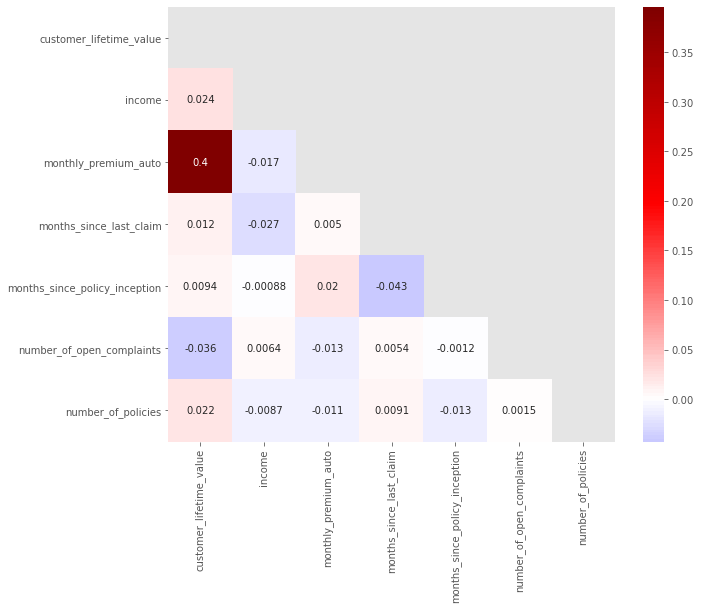

In [387]:
correlations_matrix=marketing.corr()
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax= plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap='seismic', center=0)
plt.show()

In [388]:
# to drop the column which has high correlation
# decided not to drop any column

 ## Check and transform for normality, skewness, outliers using histograms and distribution plots-numerical data

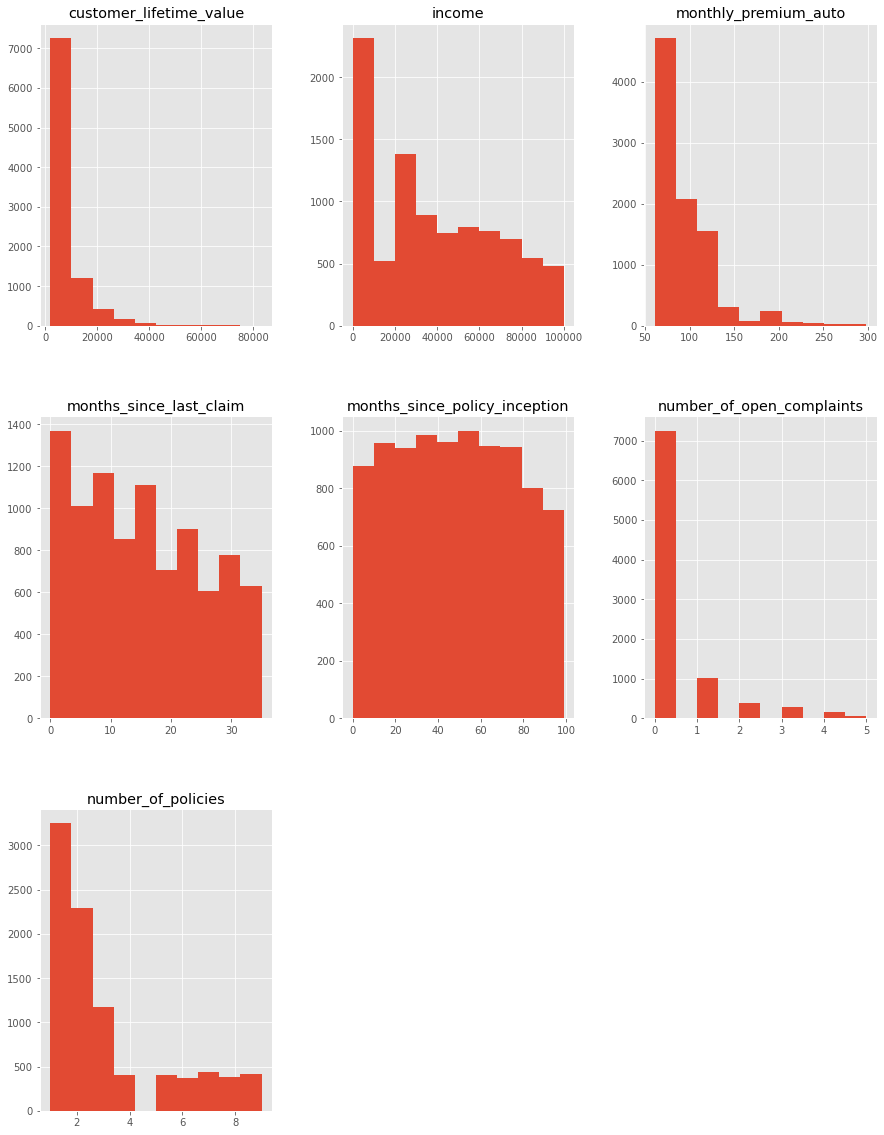

In [389]:
x_num.hist(figsize=(15,20));

<AxesSubplot:xlabel='customer_lifetime_value'>

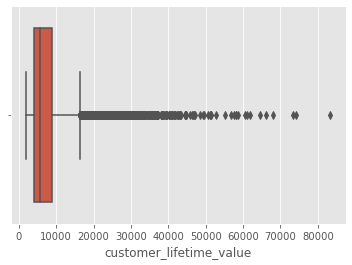

In [390]:
sns.boxplot(x=x_num['customer_lifetime_value'])

<AxesSubplot:xlabel='monthly_premium_auto'>

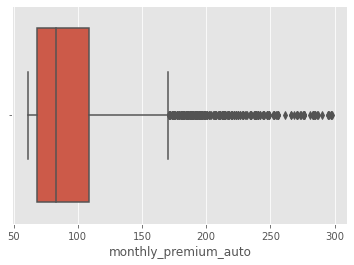

In [391]:
sns.boxplot(x=x_num['monthly_premium_auto'])

<AxesSubplot:xlabel='number_of_open_complaints'>

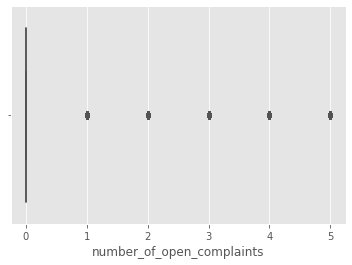

In [392]:
sns.boxplot(x=x_num['number_of_open_complaints'])

 ### Are there any other numerical columns we want to drop now because they are not correlated at all to the target variable?

In [393]:
# yes number of open complaints is not at all correlated with total_claim_amout
x_num = x_num.drop(['number_of_open_complaints'], axis = 1)

 ### if we identify outliers, they can be removed by calculating the IQR(Inter Quartile Range)

In [394]:
## Finding IQR value for the feature customer_lifetime_value
iqr=np.percentile(x_num['customer_lifetime_value'],75)-np.percentile(x_num['customer_lifetime_value'],25)
upper_limit=np.percentile(x_num['customer_lifetime_value'],75)+(1.5*iqr)
lower_limit=np.percentile(x_num['customer_lifetime_value'],25)-(1.5*iqr)
excl_outliers=x_num[(x_num['customer_lifetime_value']>lower_limit)&(x_num['customer_lifetime_value']<upper_limit)]

<AxesSubplot:xlabel='customer_lifetime_value'>

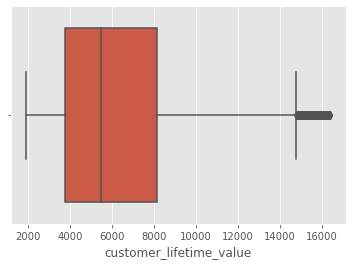

In [395]:
sns.boxplot(x=excl_outliers['customer_lifetime_value'])

<AxesSubplot:>

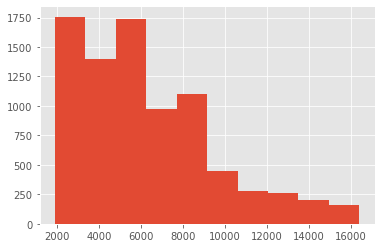

In [396]:
excl_outliers['customer_lifetime_value'].hist()

<AxesSubplot:>

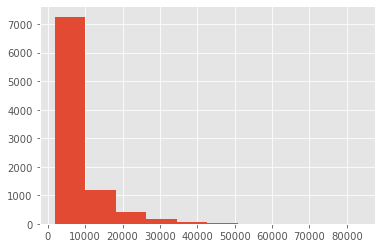

In [397]:
# plotted again just to compare before and after outliers
x_num['customer_lifetime_value'].hist()

In [398]:
excl_outliers.shape

(8317, 6)

In [399]:
excl_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 0 to 10908
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8317 non-null   float64
 1   income                         8317 non-null   int64  
 2   monthly_premium_auto           8317 non-null   int64  
 3   months_since_last_claim        8317 non-null   float64
 4   months_since_policy_inception  8317 non-null   int64  
 5   number_of_policies             8317 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 454.8 KB


In [400]:
excl_outliers.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
count,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000
mean,6279.177892,37638.476855,90.949621,15.034387,48.063124,3.037994
std,3240.426385,30415.335684,31.047412,10.038850,27.920250,2.470996
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000
25%,3746.751625,0.000000,68.000000,6.000000,24.000000,1.000000
50%,5470.060561,33837.000000,81.000000,14.000000,48.000000,2.000000
75%,8162.617053,62229.000000,107.000000,23.000000,71.000000,4.000000
max,16407.664610,99981.000000,298.000000,35.000000,99.000000,9.000000


In [401]:
## Finding IQR value for the feature monthly_premium-auto
iqr_mpa=np.percentile(x_num['monthly_premium_auto'],75)-np.percentile(x_num['monthly_premium_auto'],25)
upper_limit=np.percentile(x_num['monthly_premium_auto'],75)+(1.5*iqr_mpa)
lower_limit=np.percentile(x_num['monthly_premium_auto'],25)-(1.5*iqr_mpa)
excl_outliers_mpa=x_num[(x_num['monthly_premium_auto']>lower_limit)&(x_num['monthly_premium_auto']<upper_limit)]

<AxesSubplot:xlabel='monthly_premium_auto'>

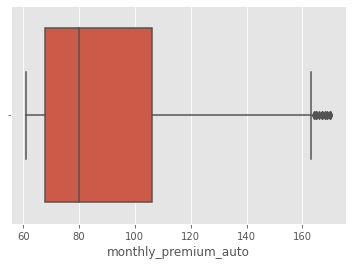

In [402]:
sns.boxplot(x=excl_outliers_mpa['monthly_premium_auto'])

<AxesSubplot:>

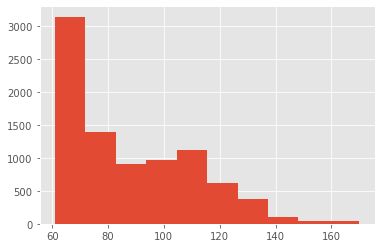

In [403]:
excl_outliers_mpa['monthly_premium_auto'].hist()

<AxesSubplot:>

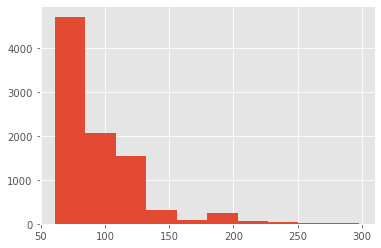

In [404]:
#replotted again to see the impact
x_num['monthly_premium_auto'].hist()

In [405]:
excl_outliers_mpa.shape

(8704, 6)

In [406]:
excl_outliers_mpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 10908
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8704 non-null   float64
 1   income                         8704 non-null   int64  
 2   monthly_premium_auto           8704 non-null   int64  
 3   months_since_last_claim        8704 non-null   float64
 4   months_since_policy_inception  8704 non-null   int64  
 5   number_of_policies             8704 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 476.0 KB


In [407]:
excl_outliers_mpa.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
count,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000
mean,7577.478745,37669.705882,87.591567,15.084444,47.946921,2.965763
std,6192.134004,30463.877452,22.885502,10.058778,27.941271,2.386184
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000
25%,3873.647046,0.000000,68.000000,6.000000,24.000000,1.000000
50%,5597.124960,33806.000000,80.000000,14.000000,48.000000,2.000000
75%,8659.357603,62399.250000,106.000000,23.000000,71.000000,4.000000
max,57520.501510,99981.000000,170.000000,35.000000,99.000000,9.000000


 ### Rescaling transformation methods- for one or more skewed columns or a column with distant, legitimate outliers 

 #### Log Transformation

In [408]:
def log_transform_clean(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

x_num['customer_lifetime_value_log']=list(map(log_transform_clean,x_num['customer_lifetime_value']))

<AxesSubplot:>

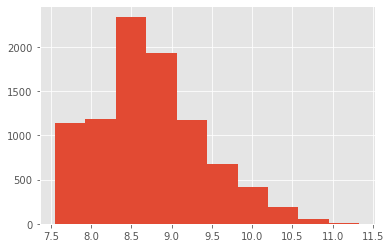

In [409]:
x_num['customer_lifetime_value_log'].hist()

In [410]:
x_num['customer_lifetime_value_log']=x_num['customer_lifetime_value_log'].fillna(np.mean(x_num['customer_lifetime_value_log']))


In [411]:
x_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_policies             9134 non-null   int64  
 6   customer_lifetime_value_log    9134 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 570.9 KB


In [412]:
x_num['monthly_premium_auto_log']=list(map(log_transform_clean,x_num['monthly_premium_auto']))
x_num['monthly_premium_auto_log']=x_num['monthly_premium_auto_log'].fillna(np.mean(x_num['monthly_premium_auto_log']))

In [413]:
x_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_policies             9134 non-null   int64  
 6   customer_lifetime_value_log    9134 non-null   float64
 7   monthly_premium_auto_log       9134 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 642.2 KB


<AxesSubplot:>

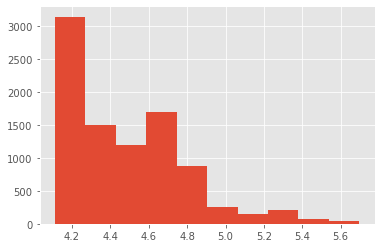

In [414]:
x_num['monthly_premium_auto_log'].hist()

<AxesSubplot:>

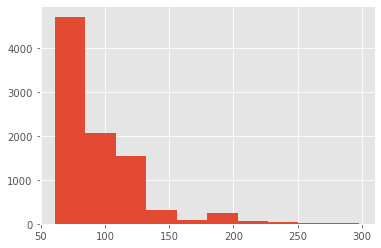

In [415]:
x_num['monthly_premium_auto'].hist()

 ### if satisfied with a proposed change, replace the column

In [416]:
x_num = x_num.drop(['monthly_premium_auto'],axis=1)

In [417]:
x_num = x_num.drop(['customer_lifetime_value'],axis=1)

In [418]:
x_num.head()

,income,months_since_last_claim,months_since_policy_inception,number_of_policies,customer_lifetime_value_log,monthly_premium_auto_log
0,48029,7.0,52,9,8.478290,4.110874
1,0,3.0,26,1,7.709095,4.158883
2,22139,34.0,31,2,9.612327,4.605170
3,49078,10.0,3,2,10.013796,4.574711
6,37405,8.0,99,4,8.524176,4.143135


 ## sklearn rescaling methods - for many columns at once

 ### Numerical rescaling 

In [419]:
# standardising all numeric features / rescaling using robust scalar
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
x_robust=robust.fit_transform(x_num)

In [420]:
scaled=pd.DataFrame(x_robust)

In [421]:
scaled.head()

,0,1,2,3,4,5
0,0.226885,-0.411765,0.085106,2.333333,-0.227556,-0.652693
1,-0.543798,-0.647059,-0.468085,-0.333333,-1.179346,-0.550944
2,-0.188551,1.176471,-0.361702,0.000000,1.175685,0.394900
3,0.243718,-0.235294,-0.957447,0.000000,1.672456,0.330346
4,0.056410,-0.352941,1.085106,0.666667,-0.170777,-0.584320


In [422]:
# standardizing all numeric features / rescaling using MinMax scaler
from sklearn.preprocessing import MinMaxScaler 

transform=MinMaxScaler().fit(x_num)
x_mmscaled=transform.transform(x_num)

In [423]:
x_mmscaled.shape

(9134, 6)

In [424]:
x_num.shape

(9134, 6)

 ### Check the histograms to see the best scaling approach

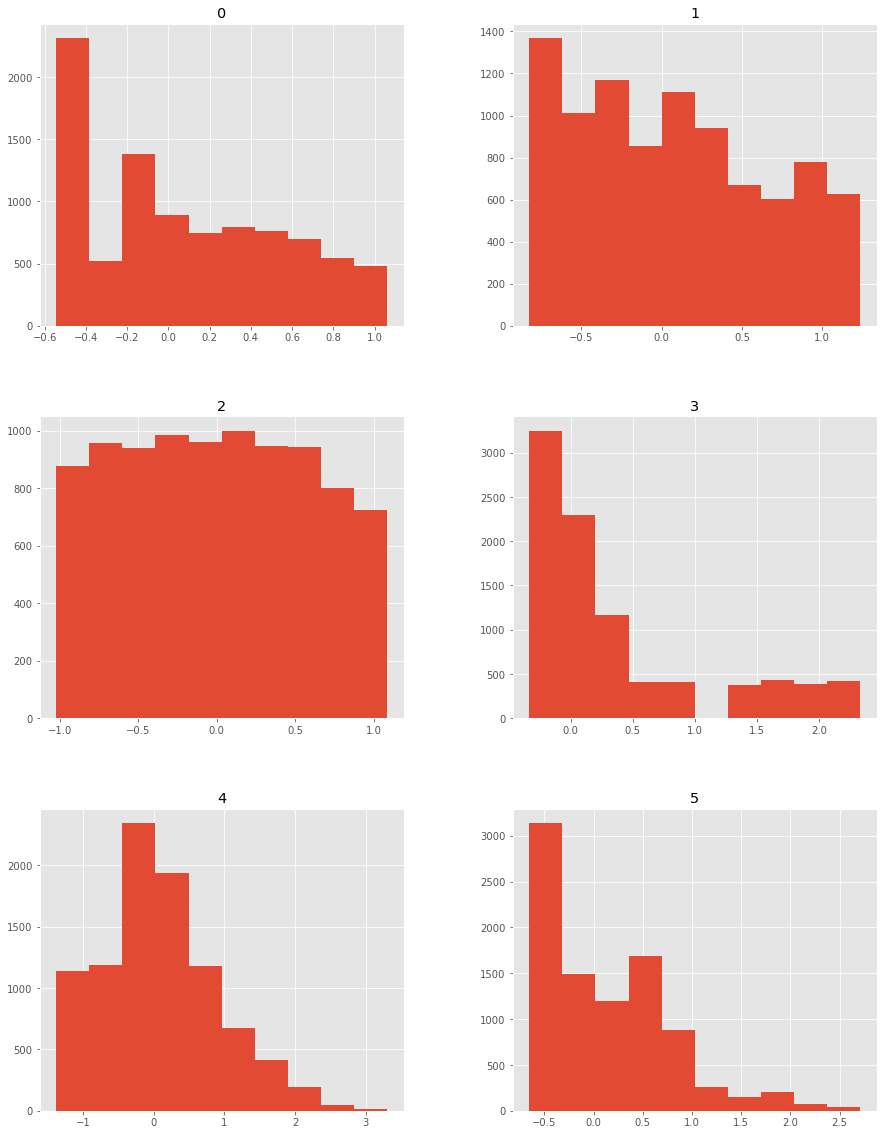

In [425]:
# first approach
scaled.hist(figsize = (15,20));

 ### Select which numerical transformation process you will use

In [426]:
x_num = scaled

 ## Pre processing categorical columns

In [427]:
x_cat.head(2)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize


In [428]:
x_cat['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [429]:
#x_cat['response'].value_counts()

In [430]:
#x_cat['coverage'].value_counts()

In [431]:
#x_cat['education'].value_counts()

In [432]:
x_cat['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [433]:
 ### Categorical features to drop
x_cat = x_cat.drop(['state','response','education','employmentstatus','policy','renew_offer_type','sales_channel','vehicle_class'],axis = 1)

In [434]:
x_cat.head()

,customer,coverage,effective_to_date,gender,marital_status,policy_type,vehicle_size
0,DK49336,Basic,2/18/11,M,Married,Corporate Auto,Medsize
1,KX64629,Basic,1/18/11,F,Single,Personal Auto,Medsize
2,LZ68649,Basic,2/10/11,M,Single,Personal Auto,Medsize
3,XL78013,Extended,1/11/11,M,Single,Corporate Auto,Medsize
6,IW72280,Basic,2/14/11,F,Married,Corporate Auto,Medsize


In [435]:
x_cat = x_cat.drop(['customer','marital_status'],axis = 1)

 ### Turning categories into numbers


 #### one hot encoder

In [436]:
# Using OHE
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat)
encoded = encoder.transform(x_cat).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [437]:
# Get dummies
x_cat_new = pd.get_dummies(x_cat, columns=['coverage','effective_to_date','gender','policy_type','vehicle_size'])


In [438]:
x_cat_new

,coverage_Basic,coverage_Extended,coverage_Premium,effective_to_date_1/1/11,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,...,effective_to_date_2/8/11,effective_to_date_2/9/11,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
10904,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
10906,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
10907,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


 ### Select which categorical transformation process you will use

In [439]:
x_cat = x_cat_new

In [440]:
y.shape

(9134,)

In [441]:
x_cat.shape

(9134, 70)

In [442]:
x_cat.head()

,coverage_Basic,coverage_Extended,coverage_Premium,effective_to_date_1/1/11,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,...,effective_to_date_2/8/11,effective_to_date_2/9/11,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


 ## Bring categorical and numerical x back together

In [443]:
x=pd.concat((x_num,x_cat),axis=1)

In [444]:
x.head(2)

,0,1,2,3,4,5,coverage_Basic,coverage_Extended,coverage_Premium,effective_to_date_1/1/11,...,effective_to_date_2/8/11,effective_to_date_2/9/11,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.226885,-0.411765,0.085106,2.333333,-0.227556,-0.652693,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.543798,-0.647059,-0.468085,-0.333333,-1.179346,-0.550944,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


 Check the shape of y array and x and y should have an equal no of rows

In [445]:
x.shape

(10647, 76)

In [446]:
y.shape

(9134,)

In [447]:
## i have different number of columns
